In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文字符
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [154]:
housing_data = pd.read_excel(r"C:\Users\user\Desktop\数据输入表_公建_建模预测test.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [155]:
display(housing_data)

,year,gdp,gdtz,gtgj,egr,pop,pop_hj,pop_cz,pop_czl,czhl_cz,xzld,gysz,demand
0,2012.1,2817.07,1033.301219,370.260000,35.6,367,190.92,154.52,88.6,0.809344,623.1,0.183,1.053878e+06
1,2012.2,2817.07,1033.301219,370.260000,35.6,367,190.92,154.52,88.6,0.809344,623.1,0.183,1.678595e+06
2,2012.3,2817.07,1033.301219,370.260000,35.6,367,190.92,154.52,88.6,0.809344,623.1,0.183,3.214255e+06
3,2012.4,2817.07,1033.301219,370.260000,35.6,367,190.92,154.52,88.6,0.809344,623.1,0.183,9.378395e+05
4,2013.1,3018.16,1044.667533,390.570000,34.1,373,196.78,159.69,89.6,0.811515,587.0,0.131,2.165285e+06
5,2013.2,3018.16,1044.667533,390.570000,34.1,373,196.78,159.69,89.6,0.811515,587.0,0.131,4.153025e+06
6,2013.3,3018.16,1044.667533,390.570000,34.1,373,196.78,159.69,89.6,0.811515,587.0,0.131,1.232492e+06
7,2013.4,3018.16,1044.667533,390.570000,34.1,373,196.78,159.69,89.6,0.811515,587.0,0.131,2.327864e+06
8,2014.1,3273.54,1219.127011,426.330000,33.2,381,203.44,165.59,88.8,0.813950,475.0,0.121,2.576121e+06
9,2014.2,3273.54,1219.127011,426.330000,33.2,381,203.44,165.59,88.8,0.813950,475.0,0.121,3.657696e+06


In [156]:
X = housing_data.drop(['year','demand'], axis=1)
y = housing_data['demand']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [157]:
# 从python机器学习与数据挖掘工具库sklearn中导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

#导入网格搜说交叉验证，网格搜索可以让模型参数按我们给定的列表遍历，找到效果最好的模型
#交叉验证可以充分评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

In [158]:
#构造参数字典，让这三个参数按列表中的顺序排列组合遍历一遍
param_grid = {
    'n_estimators':[100,200,250,300,350], #决策树的个数
    'max_depth':[10,15,20,23,25,28,30], #最大树深，树太深会造成过拟合
    'max_features':[0.4,0.5,0.6,0.7,0.8] #决策划分时考虑的最大特征数
}

In [159]:
#实例化随机森林回归器
rf = RandomForestRegressor()

In [160]:
#以随机森林回归器为基础构造网络搜索回归器
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)

In [161]:
#在训练集上训练
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20, 23, 25, 28, 30],
                         'max_features': [0.4, 0.5, 0.6, 0.7, 0.8],
                         'n_estimators': [100, 200, 250, 300, 350]})

In [162]:
#查看最好的参数
print(grid.best_params_)

{'max_depth': 20, 'max_features': 0.6, 'n_estimators': 100}


In [163]:
#指定模型为效果最好参数对应的模型
rf_reg = grid.best_estimator_

In [164]:
rf_reg

RandomForestRegressor(max_depth=20, max_features=0.6)

In [165]:
#可视化其中一颗决策树
from sklearn import tree
import pydotplus
from IPython.display import Image, display

In [ ]:
#从随机森林模型中选取一颗决策树进行可视化
estimator = rf_reg.estimators_[3]
dot_data = tree.export_graphviz(estimator,
                                out_file = None,
                                #feature_names = iris_feature_name,
                                #class_names = iris_target_name,
                                filled = True,
                                rounded = True
                                )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# 特征重要度分析

In [15]:
rf_reg.feature_importances_

array([0.09389919, 0.12368861, 0.10545099, 0.09239852, 0.07951531,
       0.07253451, 0.0538974 , 0.10646845, 0.05745939, 0.11680697,
       0.09788065])

In [16]:
X.columns

Index(['gdp', 'gtzz', 'egr', 'pop', 'pop_hj', 'pop_cz', 'pop_czl', 'czhl_cz',
       'dkll', 'xfzs', 'xfzs_l'],
      dtype='object')

In [17]:
import numpy as np
print('特征排序')
feature_names = X.columns
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

特征排序


In [18]:
for index in indices:
    print('feature %s (%f)'%(feature_names[index], feature_importances[index]))

feature gtzz (0.123689)
feature xfzs (0.116807)
feature czhl_cz (0.106468)
feature egr (0.105451)
feature xfzs_l (0.097881)
feature gdp (0.093899)
feature pop (0.092399)
feature pop_hj (0.079515)
feature pop_cz (0.072535)
feature dkll (0.057459)
feature pop_czl (0.053897)


In [ ]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices], color='b')
plt.show()

# 可视化测试集上的回归预测结果

In [166]:
result = {'id':y_test.index, 'label':y_test, 'prediction':rf_reg.predict(x_test)}
result = pd.DataFrame(result)

In [167]:
display(result)

,id,label,prediction
22,22,2.071276e+06,3.271489e+06
20,20,2.521870e+06,3.271489e+06
25,25,2.110634e+06,3.221837e+06
4,4,2.165285e+06,2.517718e+06
10,10,2.039054e+04,3.044966e+06
15,15,1.305754e+06,1.628028e+06
28,28,2.249258e+06,2.833687e+06
11,11,3.065940e+05,3.044966e+06


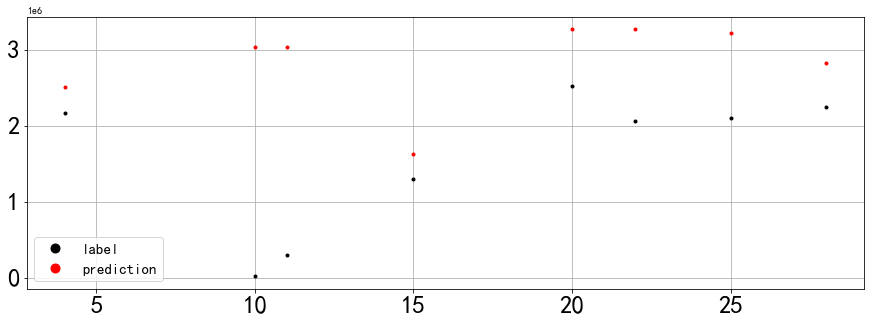

In [168]:
result['label'].plot(style='k.',figsize=(15,5))
result['prediction'].plot(style='r.')
#设置图例文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)
#设置坐标文字大小
plt.tick_params(labelsize=25)
#生成刻度线网格
plt.grid()

# 计算MSE均方误差和RMSE均方根误差

In [169]:
from sklearn import metrics

In [170]:
MSE = metrics.mean_squared_error(y, rf_reg.predict(X))

In [171]:
MSE

1680601243757.4312

In [172]:
np.sqrt(MSE)

1296380.0537486803

# 提交结果

In [127]:
result = {'ID':y_test.index, 'label':y_test, 'prediction':rf_reg.predict(x_test)}
result = pd.DataFrame(result)

In [75]:
result.to_excel('C:\Users\user\Desktop\数据输入表_住宅_建模预测test_result.xlsx',index=None)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-75-49b641086416>, line 1)

# 成交数据测试

In [173]:
testing_data = pd.read_excel(r"C:\Users\user\Desktop\数据输入表_公建_预测.xlsx")

In [174]:
testing_data.head()

,year,gdp,gdtz,gtgj,egr,pop,pop_hj,pop_cz,pop_czl,czhl_cz,xzld,gysz,demand
0,2023.1,8066.49,2985.9555,1372.234293,30.8,532.7,302.1,265.3,90.81,0.878,424,0.043,947190.978
1,2023.2,8066.49,2985.9555,1372.234293,30.8,532.7,302.1,265.3,90.81,0.878,424,0.043,2208158.558
2,2023.3,8066.49,2985.9555,1372.234293,30.8,532.7,302.1,265.3,90.81,0.878,424,0.043,3245042.716
3,2023.4,8066.49,2985.9555,1372.234293,30.8,532.7,302.1,265.3,90.81,0.878,424,0.043,3808281.792


In [175]:
data = testing_data.drop(['year','demand'], axis=1)
price = testing_data['demand']

In [176]:
result_test = {'label':price, 'prediction':rf_reg.predict(data)}
result_test = pd.DataFrame(result_test)

In [177]:
result_test.to_excel(r'C:\Users\user\Desktop\住宅_预测.xlsx',index=None)